# Lecture du catalogue I/149A 

***

Telechargé depuis ftp://cdsarc.u-strasbg.fr/pub/cats/I/149A
2 fichiers:

* readme
* catalog

J'ai renommé catalog en 149A-FK5.dat et édité en incluant la section *Byte-by-byte description of the file: catalog* du fichier Readme


file:///home/fwrlp/Documents/JUPYTER-NOTEBBOK/catalog/+footg8.gif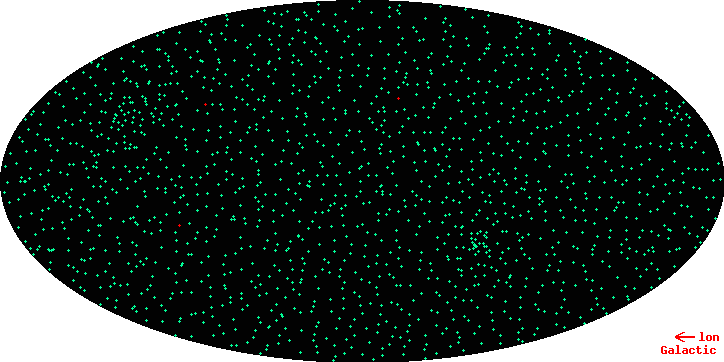

Import des bibliotheque Astropy
puis chargement du catalogue dans table nommée data

In [1]:
from astropy.io import ascii
from astropy import units as u
from astropy.units import cds
cds.enable()
from astropy.coordinates import Angle,SkyCoord,ICRS,FK5

data = ascii.read('/home/fwrlp/Documents/JUPYTER-NOTEBBOK/catalog/149A-FK5.dat',format='cds')

In [2]:
print(data.columns) #donne le nom des chacune des colonnes de la table

<TableColumns names=('FK5','RAh','RAm','RAs','pmRA','DE-','DEd','DEm','DEs','pmDE','RA1950h','RA1950m','RA1950s','pmRA1950','DE1950-','DE1950d','DE1950m','DE1950s','pmDE1950','EpRA-1900','e_RAs','e_pmRA','EpDE-1900','e_DEs','e_pmDE','Vmag','n_Vmag','SpType','plx','RV','AGK3R','SRS','HD','DM','GC')>


attribution  d'une table d'indices sur la colonne 'FK5' pour permettre une recherche sur le n° FK5

In [3]:
data.add_index('FK5')

 retrouve le numéro d'indice  (ou numéro de ligne ) de l'étoile  183 (eps Aur)  et le stocke dans la variable idx

In [4]:
idx=data.loc_indices[183] 

**Ascension droite**

crée un objet "astropy.units.quantity.Quantity" avec les colonnes RAh,RAm,RAs et stocke la valeur dans la variable RAJ2000 en angle horaire (hourangle) 
RAJ2000 est l'ascension droite de l'étoile 183

In [5]:
RAJ2000=(data['RAh'][idx]*u.hourangle+data['RAm'][idx]/60*u.hourangle+data['RAs'][idx]/3600*u.hourangle)

In [6]:
type(RAJ2000) #affiche le type d'objet

astropy.units.quantity.Quantity

In [7]:
RAJ2000.unit

Unit("hourangle")

In [58]:
RAJ2000

<Quantity 5.03281472 hourangle>

l'objet crée est un angle horaire... c'est confirmé.

pour tester je tente de créer une autre variable AngleRA en utilsant la commande *Angle* et en y affectant l'unité *angle horaire*

In [18]:
AngleRA=Angle((data['RAh'][idx],data['RAm'][idx],data['RAs']),unit=u.hourangle)

UnitTypeError: Angle instances require units equivalent to 'rad', so cannot set it to 's'.

et.... ça ne marche pas...




  **au tour des données de déclinaison...**
  
  la colonne  'DE-' contient le caractère "+" ou "-" qui correspond au signe de la déclinaison 
  on teste s'il est égal à "+" .
  Si c'est vrai le signe est positif sinon c'est négatif (+1 ou -1 dans la variable signDecJ2000

In [8]:
if data['DE-'][idx]== '+':
    signDecJ2000=1
else:
    signDecJ2000=-1

Ensuite on crée un objet "astropy.units.quantity.Quantity" avec les colonnes DEd,DEm,DEs et stocke la valeur dans la variable RAJ2000 en degré décimaux (deg ) afecté du signe de signDecJ2000
DecJ2000 est la déclinaison de l'étoile 183

In [9]:
DecJ2000=signDecJ2000*(data['DEd'][idx]*u.deg+data['DEm'][idx]*u.arcmin+data['DEs'][idx]*u.arcsec)

In [10]:
type(DecJ2000)

astropy.units.quantity.Quantity

In [11]:
DecJ2000.unit

Unit("deg")

l'objet crée est en degré... c'est confirmé.

**Objet coordonnées**

On crée maintenant un objet coordonnées dans le système de référence fk5 (en cohérence avec les données du catalogue chargé.

In [19]:
Eqc=SkyCoord(RAJ2000,DecJ2000,unit=(u.hourangle, u.deg),frame='fk5')

In [20]:
type(Eqc)

astropy.coordinates.sky_coordinate.SkyCoord

In [14]:
Eqc.unit

AttributeError: 'SkyCoord' object has no attribute 'unit'

Il n'est pas possible d'extraire les unités dans l'objet *coordonnées* défini..

En revanche c'est possible de le faire en "*extrayant*" les coordonnées d'ascension droite

On voit cependant que l'ascension droite est maintenant en Degrés

In [21]:
type(Eqc.ra)

astropy.coordinates.angles.Longitude

In [22]:
(Eqc.ra).unit

Unit("deg")

Malgré le fait d'avoir précisé l'unité *angle horaire* dans la commande *skycoord* l'uniyé de  l'ascension drtoite est en degré

Je tente de réafficher la valeur d'ascension droite dans un format *horaire* mais ça ne marche pas

In [23]:
Eqc.ra.hms

AttributeError: Longitude instance has no attribute 'hms'

de manière détournée, pour afficher les valeurs h m s de l'ascension droite, je divise par 15 pour affichze ls bonnes valeurs numériques mais avec de mauvaises unités  ° ' '' au lieu de h mn sec

In [24]:
Eqc.ra/15

<Angle 5.03281472 deg>

J'affiche la declinaison ... sans problème d'affichage de coordonnées puisque elle est en degrés

In [25]:
Eqc.dec

<Latitude 43.82328611 deg>

In [27]:
rahmsstr = Eqc.ra.to_string()
str(rahmsstr)

decdmsstr = Eqc.dec.to_string(u.degree, alwayssign=True)
str(decdmsstr)

rahmsstr + ' ' + decdmsstr



'75d29m31.995s +43d49m23.83s'

A fin de comparer je charge les coordonnées depuis la base de données Simbad sur internet

In [28]:
EqcSimbad=SkyCoord.from_name("eps AUR")

J'ai toujours le même problème d'affichage des angles horaire don j'utilise le "subterfuge" de diviser par 15 pour avoir les *bonnes* valeurs numériques.

In [29]:
EqcSimbad.ra/15

<Angle 5.03281363 deg>

In [30]:
EqcSimbad.dec

<Latitude 43.8232976 deg>

*Trouver les coordonnées équatoriales de la date du 1er juillet 2021* 

-On calcule l'intervalle de temps avec la référence J2000 et on applique ensuite les vitesses propres
-puis trouver les coordonnées *de la date* en changeant l'écliptique J2021

In [31]:
from astropy.time import Time
Datetxt='2021-07-01T00:00:00'
Date0=Time(Datetxt)#Date du jour obs
J2000=Time('2000-01-01T00:00:00')#OrigineJ2000

In [32]:
TpsPass=Date0-J2000#tps ecoulé depuis J2000

dans le fichier *readme* associé au catalogue, la colonne pmRA (vitesse propre en ascension droite) est exprimée en seconde d'angle horaire par centaine d'année  (s/ha)... 

*s/ha     pmRA      Proper motion in RA (J2000.0)*

Je fait déjà un test pour savoir si le module Atsropy.unit reconnaite cette unité..


Je converti 100 années (*yr*) en hectoAnnée (*hyr*) pour voir si ça marche...  

In [33]:
#vérif que 100 ans correspondent bien à une "hectoAnnée" (hyr)
(100*u.yr).to(u.hyr) 

<Quantity 1. hyr>

Et ça marche !!!

**Vitesse propre en Ascension droite**

In [34]:
#rappel de la valeur numérique de la donnée catalogue :
data['pmRA'][idx]

-0.006

**Vitesse propre en Déclinaison**

In [35]:
#rappel de la valeur numérique de la donnée catalogue:
data['pmDE'][idx]

-0.38

Vitesse de déplacement en Ascension droite
on divise par 3600 pour pouvoir l'exprimer en 
angle horaire par siecle (hourangle/hyr)

In [38]:

VRa=(data['pmRA'][idx]/3600)*u.hourangle/u.hyr



Vitesse de déplacement en Declinaison exrpimée en arcsec/hyr



In [42]:
VDe=(data['pmDE'][idx])*u.arcsec/u.hyr

je calcule valeur du déplacement en ascension droite sur 100 année

In [39]:

RADeplVal=(VRa*100*u.yr)
RADeplVal.to(u.hourangle)

<Quantity -1.66666667e-06 hourangle>

A priori, il n'est pas possible de convertir directement en seconde, mais en multipliant cette donnée par 3600 je doits retrouver la valeur numérique du catalogue

In [40]:
3600*(RADeplVal.to(u.hourangle))

<Quantity -0.006 hourangle>

c'est ok sauf qu'au lieu d'afficher des secondes il affiche des heures..

In [43]:
#valeur du déplacement en déclinaison sur 100 année
DEDeplVal=(VDe*100*u.yr).decompose()
DEDeplVal.to(u.arcsec)

<Quantity -0.38 arcsec>

Valeur numérique et unité OK

**Calcul du déplacement effectif sur la période qui nous interresse**

In [44]:
DeplRA=TpsPass*VRa
DeplDE=TpsPass*VDe

In [45]:
DeplRA.to(u.hourangle)

<Quantity -3.58293409e-07 hourangle>

en secondes ça donne:

In [57]:
DeplRA.to(u.hourangle)*3600

<Quantity -0.00128986 hourangle>

In [46]:
DeplDE.to(u.arcsec)

<Quantity -0.0816909 arcsec>

Calcul des coordonées **déplacées** dans le référentiel FK5*

In [51]:
EqcMove=SkyCoord(RAJ2000+DeplRA,DecJ2000+DeplDE,frame='fk5')

Puis replacées dans le référentiel des coordonnées ecliptiques J2021

In [54]:
EqcNow=EqcMove.transform_to(FK5(equinox='J2021'))


In [55]:
EqcNow.ra/15

<Angle 5.05800299 deg>

In [56]:
EqcNow.dec

<Latitude 43.85217493 deg>

**Vérification**

pour le 1er juillet le logiciel Stellarium me donne 

AD  de la date 5h03m29.59s   pres de 1s d'écart

Dec de la date 43°51'11.7" pres de 4" d'ecart

et les ephémérides du bdl dans le guide des données 
astronomique 2021

AD  5h01m58.1s  

Dec 43°49'24"


Pour finir je fait une vérif à partir des coordonnées issues de FK5 , affectées des valeurs de déplacement mais sans changement d'epoque...

In [60]:
RAJ2000+DeplRA,DecJ2000+DeplDE

(<Quantity 5.03281436 hourangle>, <Quantity 43.82326342 deg>)

qui correspond à:
    
5h01m58.13s et 43°49'23.7"

ce qui est plus proche des donnés BDL mais très eloigné de Stellarium


**TEST avec coordonnées SIMBAD**



In [63]:
(EqcSimbad.ra+DeplRA)/15,EqcSimbad.dec+DeplDE

(<Angle 5.03281327 deg>, <Angle 43.82327491 deg>)

qui correspond à:
    
5h01m58.12.7s et 43°49'23.78"

également très proches des valeurs données par BDL

**conclusion**
le passage à l'époque J2021 est inutile si on applique les valeurs de déplacement

En revanche je ne comprend pas l'écart avec les valeurs affichées par Stellarium..

